In [1]:
import random
import matplotlib.pyplot as plt
import time

In [2]:
def distance(p, q):
    return ((p[0] - q[0])**2 + (p[1] - q[1])**2) ** 0.5

def brute_force(points):
    min_d = float('inf')
    pair = None
    n = len(points)
    for i in range(n):
        for j in range(i + 1, n):
            d = distance(points[i], points[j])
            if d < min_d:
                min_d = d
                pair = (points[i], points[j])
    return min_d, pair

In [3]:
def closest_pair_rec(Px, Py):
    n = len(Px)
    if n <= 3:
        return brute_force(Px)
    
    mid = n // 2
    mid_point = Px[mid]

    Qx, Rx = Px[:mid], Px[mid:]
    Qy, Ry = [], []
    for p in Py:
        (Qy if p[0] <= mid_point[0] else Ry).append(p)

    d_left, pair_left = closest_pair_rec(Qx, Qy)
    d_right, pair_right = closest_pair_rec(Rx, Ry)

    d_min, pair_min = (d_left, pair_left) if d_left < d_right else (d_right, pair_right)

    strip = [p for p in Py if abs(p[0] - mid_point[0]) < d_min]
    
    for i in range(len(strip)):
        for j in range(i + 1, len(strip)):
            if (strip[j][1] - strip[i][1]) >= d_min:
                break
            d = distance(strip[i], strip[j])
            if d < d_min:
                d_min, pair_min = d, (strip[i], strip[j])

    return d_min, pair_min


In [4]:
def closest_pair(points):
    Px = sorted(points, key=lambda p: p[0])
    Py = sorted(points, key=lambda p: p[1])
    return closest_pair_rec(Px, Py)

Puntos generados:
(16.352969921433136, 43.848736715358385)
(7.378876346709906, 91.59418714313506)
(52.057444495545745, 59.453792063159504)
(6.643502947036506, 91.61536572781178)
(85.54470244567139, 5.119362984416509)
(23.372061009368174, 63.56406764556064)
(68.6438140083108, 30.08770661482778)
(80.4267887977376, 19.48193128534077)
(43.09208325193984, 36.39115930614347)
(27.727203683655667, 59.305393684908104)
(69.8290450013307, 83.09514620219106)
(11.58621742057987, 59.637606506599774)
(96.35628156788144, 82.0012008568476)
(24.022063880528364, 5.335173190664588)
(6.8546272787546325, 83.63866570098448)
(17.342613562993137, 57.628116348396574)
(54.888311294534255, 16.106941770415695)
(92.22594053055684, 7.658981432920509)
(71.99936954772743, 90.3500130812068)
(17.21549560880289, 96.39446256537654)
(71.21558667377313, 19.89528504517932)
(14.934936994374981, 69.4860484625805)
(10.713417741916786, 43.959527074729166)
(86.9271452588038, 50.1356801259888)
(8.889991995737512, 46.4033232040445)

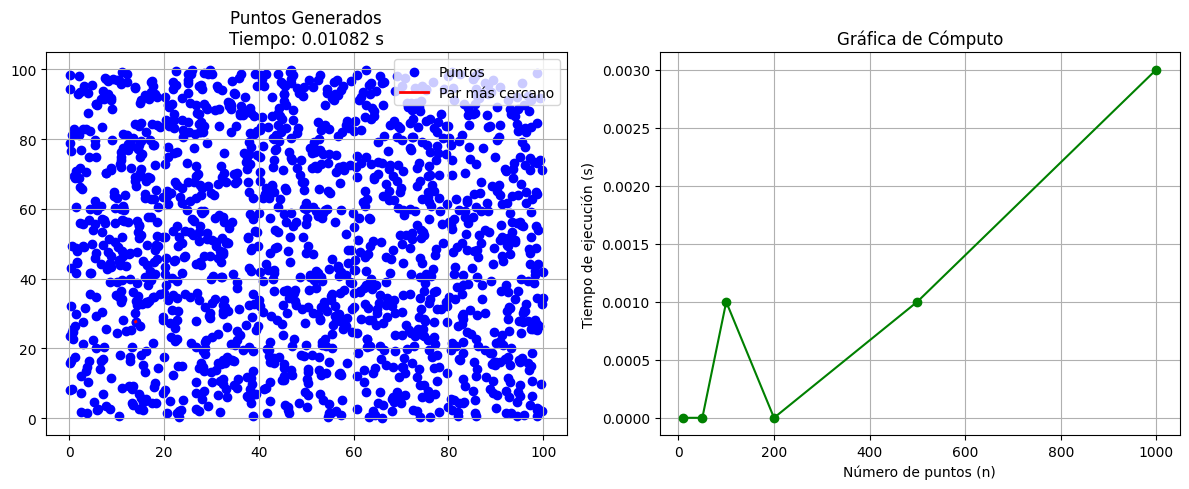

In [7]:
def main():
    n = int(input("Ingresa el número de puntos: "))
    start_time = time.time()  

    points = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(n)]

    print("Puntos generados:")
    for p in points:
        print(p)

    d, pair = closest_pair(points)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"\nLa menor distancia es: {d}\nEntre los puntos: {pair[0]} y {pair[1]}")
    print(f"\nTiempo de ejecución: {execution_time:.5f} segundos")

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    x_vals, y_vals = zip(*points)
    plt.scatter(x_vals, y_vals, color="blue", label="Puntos")
    plt.plot([pair[0][0], pair[1][0]], [pair[0][1], pair[1][1]], "r-", lw=2, label="Par más cercano")
    plt.legend()
    plt.grid()
    plt.title(f"Puntos Generados\nTiempo: {execution_time:.5f} s")

    # Gráfica de cómputo (Tiempo de ejecución vs. Número de puntos)
    n_values = [10, 50, 100, 200, 500, 1000, 2000]
    n_values = [val for val in n_values if val <= n]

    execution_times = []

    for n in n_values:
        points = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(n)]
        start_time = time.time()
        closest_pair(points)
        end_time = time.time()
        execution_times.append(end_time - start_time)

    plt.subplot(1, 2, 2)
    plt.plot(n_values, execution_times, marker='o', linestyle='-', color="green")
    plt.xlabel("Número de puntos (n)")
    plt.ylabel("Tiempo de ejecución (s)")
    plt.title("Gráfica de Cómputo")
    plt.grid()

    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    main()